# Visualization of cloud-class filtered q profiles

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
import numpy as np

In [3]:
# https://github.com/aikovoigt/nawdex-hackathon/blob/master/dict_nawdexsims.py
# define dictionary for coloring resolutions
def colordictionary():
    # manually defined colors
    mymaroon= np.array([128,   0,   0])/255
    myred   = np.array([230,  25,  75])/255
    myorange= np.array([245, 130,  48])/255
    mymagenta=np.array([240, 50, 230 ])/255
    myolive = np.array([128, 128,   0])/255
    myteal  = np.array([  0, 128, 128])/255
    myblue  = np.array([  0, 130, 200])/255
    mynavy  = np.array([  0,   0, 128])/255

    return {'80' : mymaroon, '40' : myred, '20' : myorange, '10' : myolive, '5' : myteal, '2' : myblue}

farbe = colordictionary()

In [4]:
# get height at full levels - function from Nicole
def get_fulllevel_height():
    # define simulation
    resolution = '80km'
    sim = '0001'
    expid = 'nawdexnwp-' + resolution + '-mis-' + sim
    # read ocean mask
    ipath_oceanmask = '/work/bb1018/nawdex-hackathon_pp/'
    da_ocean = xr.open_dataset(ipath_oceanmask + '/openoceanmask/' + expid + \
                               '_openoceanmask.nc')['mask_openocean']
    index = np.where(da_ocean == 1)[0]
    del da_ocean, ipath_oceanmask
    
    # read z_ifc data
    ipath = '/work/bb1018/b380459/NAWDEX/ICON_OUTPUT_NWP/' + \
            'nawdexnwp-' + resolution + '-mis-' + sim + '/'
    ds = xr.open_dataset(ipath + 'nawdexnwp-' + resolution + '-mis-' + \
                         sim + '_2016092200_fg_DOM01_ML_0036.nc')
    del ipath
    
    # apply ocean mask on z_ifc to make sure to look at ocean grid point
    ds = ds.isel(ncells=index)
    
    # calculate full levels based on z_ifc
    z_full = (ds.z_ifc[:,0] - (ds.z_ifc[:,0].diff('height_3')/2)).values
    #print(z_full)
    del resolution, sim, expid, index, ds
    return z_full

zfull = get_fulllevel_height()

In [5]:
# Helper function to - you guessed it - make sexy axes for generic values
def sexy_axes(ax,fs):
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left') 
    ax.tick_params('both',labelsize=fs)#,rotation=45)

In [9]:
basedir = '/work/bb1018/b380873/hackathon/final-output/'
let = ['(a) HI', '(b) H-M', '(c) H-L', '(d) H-M-L',
      '(e) HI', '(f) H-M', '(g) H-L', '(h) H-M-L']

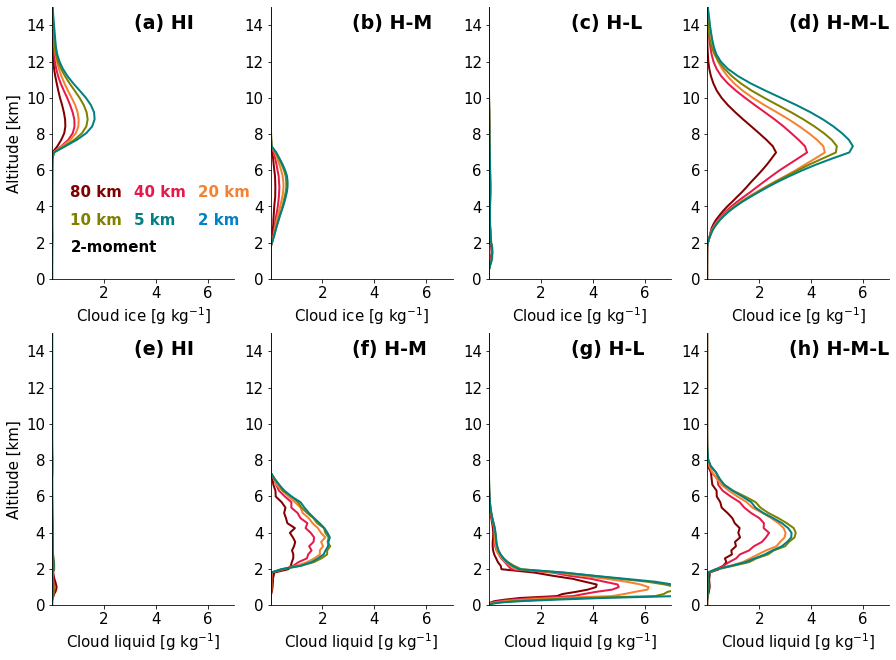

In [7]:
fs = 15
# Which microphysics to show?
mp_param = 2

# Which classes to show? 0, 3, 5, and 6 = HI, H-M, H-L, and H-M-L
mapping = {0: 0, 1: 3, 2: 5, 3: 6}

fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(15,11))
ax[0,0].set_ylabel('Altitude [km]', fontsize=fs)
ax[1,0].set_ylabel('Altitude [km]', fontsize=fs)
ax[0,0].text(0.1, 0.1, str(mp_param) + '-moment', weight='bold', fontsize=fs, transform=ax[0,0].transAxes)
for i, f in enumerate(farbe.keys()):
    if i < 3:
        ax[0,0].text(0.1 + i*0.35, 0.3, f + ' km', weight='bold', fontsize=fs, color=farbe[f],
                 transform=ax[0,0].transAxes)
    else:
        ax[0,0].text(0.1 + (i-3)*0.35, 0.2, f + ' km', weight='bold', fontsize=fs, color=farbe[f],
                 transform=ax[0,0].transAxes)

fi80 = xr.open_dataset(basedir + 'nawdexnwp-80km-mis-mp' + str(mp_param) + '.nc')
fi40 = xr.open_dataset(basedir + 'nawdexnwp-40km-mis-mp' + str(mp_param) + '.nc')
fi20 = xr.open_dataset(basedir + 'nawdexnwp-20km-mis-mp' + str(mp_param) + '.nc')
fi10 = xr.open_dataset(basedir + 'nawdexnwp-10km-mis-mp' + str(mp_param) + '.nc')
fi5 = xr.open_dataset(basedir + 'nawdexnwp-5km-mis-mp' + str(mp_param) + '.nc')
#fi2 = xr.open_dataset(basedir + 'nawdexnwp-2km-mis-mp' + str(mp_param) + '.nc')

for i in np.arange(4):    
    qi80 = fi80['qi' + str(i+1)]; qc80 = fi80['qc' + str(i+1)]
    qi40 = fi40['qi' + str(i+1)]; qc40 = fi40['qc' + str(i+1)]
    qi20 = fi20['qi' + str(i+1)]; qc20 = fi20['qc' + str(i+1)]
    qi10 = fi10['qi' + str(i+1)]; qc10 = fi10['qc' + str(i+1)]
    qi5 = fi5['qi' + str(i+1)]; qc5 = fi5['qc' + str(i+1)]
    #qi2 = fi2['qi' + str(i+1)]; qc2 = fi2['qc' + str(i+1)]
    
    ax[0,i].plot(qi80*10**6, zfull/1000, linewidth=2, color=farbe['80'])
    ax[0,i].plot(qi40*10**6, zfull/1000, linewidth=2, color=farbe['40'])
    ax[0,i].plot(qi20*10**6, zfull/1000, linewidth=2, color=farbe['20'])
    ax[0,i].plot(qi10*10**6, zfull/1000, linewidth=2, color=farbe['10'])
    ax[0,i].plot(qi5*10**6, zfull/1000, linewidth=2, color=farbe['5'])
    #ax[0,i].plot(qi2*10**6, zfull/1000, linewidth=2, color=farbe['2'])
    
    ax[1,i].plot(qc80*10**6, zfull/1000, linewidth=2, color=farbe['80'])
    ax[1,i].plot(qc40*10**6, zfull/1000, linewidth=2, color=farbe['40'])
    ax[1,i].plot(qc20*10**6, zfull/1000, linewidth=2, color=farbe['20'])
    ax[1,i].plot(qc10*10**6, zfull/1000, linewidth=2, color=farbe['10'])
    ax[1,i].plot(qc5*10**6, zfull/1000, linewidth=2, color=farbe['5'])
    #ax[1,i].plot(qc2*10**6, zfull/1000, linewidth=2, color=farbe['2'])
    
    ax[0,i].set_ylim([0,15])
    ax[1,i].set_ylim([0,15])
    
    ax[0,i].set_xlim([0.005, 7])
    ax[1,i].set_xlim([0.005, 7])
    
    #ax[0,i].set_xscale('log')
    #ax[1,i].set_xscale('log')
    
    ax[0,i].set_xlabel(r'Cloud ice [g kg$^{-1}$]', fontsize=fs)
    ax[1,i].set_xlabel(r'Cloud liquid [g kg$^{-1}$]',fontsize=fs)
    
    ax[0,i].text(0.45,0.92,let[i],fontsize=fs+4,weight='bold',transform=ax[0,i].transAxes)
    ax[1,i].text(0.45,0.92,let[i+4],fontsize=fs+4,weight='bold',transform=ax[1,i].transAxes)
    
    sexy_axes(ax[0,i], 15)
    sexy_axes(ax[1,i], 15)
    
#fig.savefig('q_mean_allres' + str(mp_param) + 'mom.pdf',bbox_inches='tight')
plt.show()

# Visualization of difference in filtered q profiles with threshold

In [7]:
def mavg(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

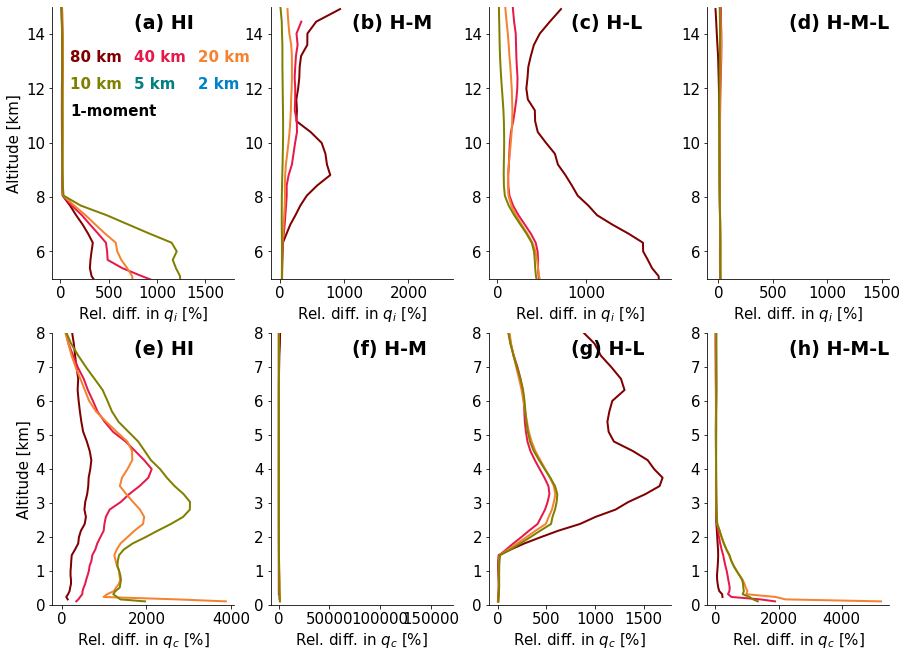

In [14]:
fs = 15
# Which microphysics to show?
mp_param = 1

# Which classes to show? 0, 3, 5, and 6 = HI, H-M, H-L, and H-M-L
mapping = {0: 0, 1: 3, 2: 5, 3: 6}

fig, ax = plt.subplots(nrows=2,ncols=4,figsize=(15,11))
ax[0,0].set_ylabel('Altitude [km]', fontsize=fs)
ax[1,0].set_ylabel('Altitude [km]', fontsize=fs)
ax[0,0].text(0.1, 0.6, str(mp_param) + '-moment', weight='bold', fontsize=fs, transform=ax[0,0].transAxes)
for i, f in enumerate(farbe.keys()):
    if i < 3:
        ax[0,0].text(0.1 + i*0.35, 0.8, f + ' km', weight='bold', fontsize=fs, color=farbe[f],
                 transform=ax[0,0].transAxes)
    else:
        ax[0,0].text(0.1 + (i-3)*0.35, 0.7, f + ' km', weight='bold', fontsize=fs, color=farbe[f],
                 transform=ax[0,0].transAxes)

fi80_1 = xr.open_dataset(basedir + 'nawdexnwp-80km-mis-mp' + str(mp_param) + '.nc')
fi80_2 = xr.open_dataset(basedir + 'nawdexnwp-80km-mis-mp' + str(mp_param) + '_hq60_mq60_lq25.nc')
#fi80_2 = xr.open_dataset(basedir + 'nawdexnwp-80km-mis-mp' + str(mp_param) + '_hq65_mq70_lq35.nc')

fi40_1 = xr.open_dataset(basedir + 'nawdexnwp-40km-mis-mp' + str(mp_param) + '.nc')
fi40_2 = xr.open_dataset(basedir + 'nawdexnwp-40km-mis-mp' + str(mp_param) + '_hq60_mq60_lq25.nc')
#fi40_2 = xr.open_dataset(basedir + 'nawdexnwp-40km-mis-mp' + str(mp_param) + '_hq65_mq70_lq35.nc')

fi20_1 = xr.open_dataset(basedir + 'nawdexnwp-20km-mis-mp' + str(mp_param) + '.nc')
fi20_2 = xr.open_dataset(basedir + 'nawdexnwp-20km-mis-mp' + str(mp_param) + '_hq60_mq60_lq25.nc')
#fi20_2 = xr.open_dataset(basedir + 'nawdexnwp-20km-mis-mp' + str(mp_param) + '_hq65_mq70_lq35.nc')

fi10_1 = xr.open_dataset(basedir + 'nawdexnwp-10km-mis-mp' + str(mp_param) + '.nc')
fi10_2 = xr.open_dataset(basedir + 'nawdexnwp-10km-mis-mp' + str(mp_param) + '_hq60_mq60_lq25.nc')
#fi10_2 = xr.open_dataset(basedir + 'nawdexnwp-10km-mis-mp' + str(mp_param) + '_hq65_mq70_lq35.nc')

#fi5 = xr.open_dataset(basedir + 'nawdexnwp-5km-mis-mp' + str(mp_param) + '.nc')
#fi2 = xr.open_dataset(basedir + 'nawdexnwp-2km-mis-mp' + str(mp_param) + '.nc')

for i in np.arange(4):    
    qi80_rd = (fi80_1['qi' + str(i+1)] - fi80_2['qi' + str(i+1)])/fi80_2['qi' + str(i+1)]*100
    qc80_rd = (fi80_1['qc' + str(i+1)] - fi80_2['qc' + str(i+1)])/fi80_2['qc' + str(i+1)]*100
    qi40_rd = (fi40_1['qi' + str(i+1)] - fi40_2['qi' + str(i+1)])/fi40_2['qi' + str(i+1)]*100
    qc40_rd = (fi40_1['qc' + str(i+1)] - fi40_2['qc' + str(i+1)])/fi40_2['qc' + str(i+1)]*100
    qi20_rd = (fi20_1['qi' + str(i+1)] - fi20_2['qi' + str(i+1)])/fi20_2['qi' + str(i+1)]*100
    qc20_rd = (fi20_1['qc' + str(i+1)] - fi20_2['qc' + str(i+1)])/fi20_2['qc' + str(i+1)]*100
    qi10_rd = (fi10_1['qi' + str(i+1)] - fi10_2['qi' + str(i+1)])/fi10_2['qi' + str(i+1)]*100
    qc10_rd = (fi10_1['qc' + str(i+1)] - fi10_2['qc' + str(i+1)])/fi10_2['qc' + str(i+1)]*100
    #qi5 = fi5['qi' + str(i+1)]; qc5 = fi5['qc' + str(i+1)]
    #qi2 = fi2['qi' + str(i+1)]; qc2 = fi2['qc' + str(i+1)]
    
    ax[0,i].plot(mavg(qi80_rd, 5), mavg(zfull, 5)/1000, linewidth=2, color=farbe['80'])  #*10**6
    ax[0,i].plot(mavg(qi40_rd, 5), mavg(zfull, 5)/1000, linewidth=2, color=farbe['40'])
    ax[0,i].plot(mavg(qi20_rd, 5), mavg(zfull, 5)/1000, linewidth=2, color=farbe['20'])
    ax[0,i].plot(mavg(qi10_rd, 5), mavg(zfull, 5)/1000, linewidth=2, color=farbe['10'])
    #ax[0,i].plot(qi5*10**6, zfull/1000, linewidth=2, color=farbe['5'])
    #ax[0,i].plot(qi2*10**6, zfull/1000, linewidth=2, color=farbe['2'])
    
    ax[1,i].plot(mavg(qc80_rd, 5), mavg(zfull, 5)/1000, linewidth=2, color=farbe['80'])
    ax[1,i].plot(mavg(qc40_rd, 5), mavg(zfull, 5)/1000, linewidth=2, color=farbe['40'])
    ax[1,i].plot(mavg(qc20_rd, 5), mavg(zfull, 5)/1000, linewidth=2, color=farbe['20'])
    ax[1,i].plot(mavg(qc10_rd, 5), mavg(zfull, 5)/1000, linewidth=2, color=farbe['10'])
    #ax[1,i].plot(qc5*10**6, zfull/1000, linewidth=2, color=farbe['5'])
    #ax[1,i].plot(qc2*10**6, zfull/1000, linewidth=2, color=farbe['2'])
    
    ax[0,i].set_ylim([5,15])
    ax[1,i].set_ylim([0,8])
    
    #ax[0,i].set_xlim([0, 30])
    #ax[1,i].set_xlim([0, 30])
    
    ax[0,i].set_xlabel(r'Rel. diff. in $q_i$ [%]', fontsize=fs)
    ax[1,i].set_xlabel(r'Rel. diff. in $q_c$ [%]',fontsize=fs)
    
    ax[0,i].text(0.45,0.92,let[i],fontsize=fs+4,weight='bold',transform=ax[0,i].transAxes)
    ax[1,i].text(0.45,0.92,let[i+4],fontsize=fs+4,weight='bold',transform=ax[1,i].transAxes)
    
    sexy_axes(ax[0,i], 15)
    sexy_axes(ax[1,i], 15)
    
#fig.savefig('qdiff_mean_allres' + str(mp_param) + 'mom.pdf',bbox_inches='tight')
plt.show()